<a href="https://colab.research.google.com/github/22130056-HoHoangDuy/Labs_ML/blob/main/22130056_HoHoangDuy_Lab9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#Import
from sklearn import datasets
from sklearn.model_selection import cross_val_score, cross_validate, StratifiedKFold
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.pipeline import Pipeline
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
from prettytable import PrettyTable
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
#Iris
iris = datasets.load_iris()
X, y = iris.data, iris.target
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [3]:
#Connect to Drive
from google.colab import drive
drive.mount('/content/gdrive')
%cd '/content/gdrive/MyDrive/ML_Labs_Datasets'

Mounted at /content/gdrive
/content/gdrive/MyDrive/ML_Labs_Datasets


In [ ]:
#Task1.1
svm = SVC(kernel='linear', random_state=42)

scoring = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']
svm_scores = cross_validate(svm, X, y, cv=cv, scoring=scoring)

svm_results = {metric: np.mean(svm_scores[f'test_{metric}']) for metric in ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']}
svm_results


{'accuracy': np.float64(0.9866666666666667),
 'precision_macro': np.float64(0.9888888888888889),
 'recall_macro': np.float64(0.9866666666666667),
 'f1_macro': np.float64(0.9865319865319865)}

In [ ]:
#Task1.2
# Chọn 2 đặc trưng tốt nhất
selector = SelectKBest(score_func=f_classif, k=2)
rf_pipeline = Pipeline([
    ('feature_selection', selector),
    ('classifier', RandomForestClassifier(random_state=42))
])

knn_pipeline = Pipeline([
    ('feature_selection', selector),
    ('classifier', KNeighborsClassifier())
])
rf_scores = cross_validate(rf_pipeline, X, y, cv=cv, scoring=scoring)
knn_scores = cross_validate(knn_pipeline, X, y, cv=cv, scoring=scoring)
rf_results = {metric: np.mean(rf_scores[f'test_{metric}']) for metric in ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']}
knn_results = {metric: np.mean(knn_scores[f'test_{metric}']) for metric in ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']}

rf_results, knn_results


({'accuracy': np.float64(0.9666666666666668),
  'precision_macro': np.float64(0.9694949494949496),
  'recall_macro': np.float64(0.9666666666666666),
  'f1_macro': np.float64(0.9665152780942254)},
 {'accuracy': np.float64(0.96),
  'precision_macro': np.float64(0.9610774410774411),
  'recall_macro': np.float64(0.96),
  'f1_macro': np.float64(0.9599331662489557)})

In [ ]:
#Task1.3
table = PrettyTable()
table.field_names = ["Model", "Accuracy", "Precision", "Recall", "F1 Score"]

table.add_row(["SVM",
               round(svm_results['accuracy'], 4),
               round(svm_results['precision_macro'], 4),
               round(svm_results['recall_macro'], 4),
               round(svm_results['f1_macro'], 4)])

table.add_row(["RandomForest",
               round(rf_results['accuracy'], 4),
               round(rf_results['precision_macro'], 4),
               round(rf_results['recall_macro'], 4),
               round(rf_results['f1_macro'], 4)])

table.add_row(["kNN",
               round(knn_results['accuracy'], 4),
               round(knn_results['precision_macro'], 4),
               round(knn_results['recall_macro'], 4),
               round(knn_results['f1_macro'], 4)])

print(table)

+--------------+----------+-----------+--------+----------+
|    Model     | Accuracy | Precision | Recall | F1 Score |
+--------------+----------+-----------+--------+----------+
|     SVM      |  0.9867  |   0.9889  | 0.9867 |  0.9865  |
| RandomForest |  0.9667  |   0.9695  | 0.9667 |  0.9665  |
|     kNN      |   0.96   |   0.9611  |  0.96  |  0.9599  |
+--------------+----------+-----------+--------+----------+


In [4]:
#Task2
train_df = pd.read_csv('fashion-mnist_train.csv')
test_df = pd.read_csv('fashion-mnist_test.csv')

X_train = train_df.drop('label', axis=1).values
y_train = train_df['label'].values
X_test = test_df.drop('label', axis=1).values
y_test = test_df['label'].values

X = np.concatenate((X_train, X_test), axis=0)
y = np.concatenate((y_train, y_test), axis=0)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

from sklearn.model_selection import KFold
kf = KFold(n_splits=3, shuffle=True, random_state=42)

In [ ]:
#Task2.1
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from scipy.stats import mode
kmeans = KMeans(n_clusters=10, random_state=42)
kmeans.fit(X_scaled)
kmeans_labels = kmeans.labels_

def relabel_clusters(true_labels, cluster_labels):
    new_labels = np.zeros_like(cluster_labels)
    for i in range(10):
        mask = (cluster_labels == i)
        if np.any(mask):
            new_labels[mask] = mode(true_labels[mask])[0]
    return new_labels

kmeans_pred = relabel_clusters(y, kmeans_labels)

kmeans_results = {
    'accuracy': accuracy_score(y, kmeans_pred),
    'precision': precision_score(y, kmeans_pred, average='macro'),
    'recall': recall_score(y, kmeans_pred, average='macro'),
    'f1_score': f1_score(y, kmeans_pred, average='macro')
}
kmeans_results

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


{'accuracy': 0.5798,
 'precision': 0.5532507604966087,
 'recall': 0.5798,
 'f1_score': 0.5564783386226402}

In [ ]:
#Task2.2
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_validate, KFold
import numpy as np

models = {
    'RandomForest': RandomForestClassifier(n_jobs=-1, random_state=42),
    'kNN': KNeighborsClassifier(n_jobs=-1),
    'SVM': SVC(kernel='linear', random_state=42)
}

kf = KFold(n_splits=5, shuffle=True, random_state=42)
scoring = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']
results = {}

for name, model in models.items():
    # Use the concatenated target variable y, which matches the size of X_scaled
    scores = cross_validate(model, X_scaled, y, cv=kf, scoring=scoring, n_jobs=-1)
    results[name] = {
        'accuracy': np.mean(scores['test_accuracy']),
        'precision': np.mean(scores['test_precision_macro']),
        'recall': np.mean(scores['test_recall_macro']),
        'f1_score': np.mean(scores['test_f1_macro'])
    }

results

{'RandomForest': {'accuracy': np.float64(0.8838571428571429),
  'precision': np.float64(0.8828251024465243),
  'recall': np.float64(0.8838532621674524),
  'f1_score': np.float64(0.8822881080021954)},
 'kNN': {'accuracy': np.float64(0.8573999999999999),
  'precision': np.float64(0.859724317752417),
  'recall': np.float64(0.8573759241703724),
  'f1_score': np.float64(0.8570026259872154)},
 'SVM': {'accuracy': np.float64(0.8456428571428573),
  'precision': np.float64(0.8454346614856207),
  'recall': np.float64(0.8457000715109124),
  'f1_score': np.float64(0.8448870596794793)}}

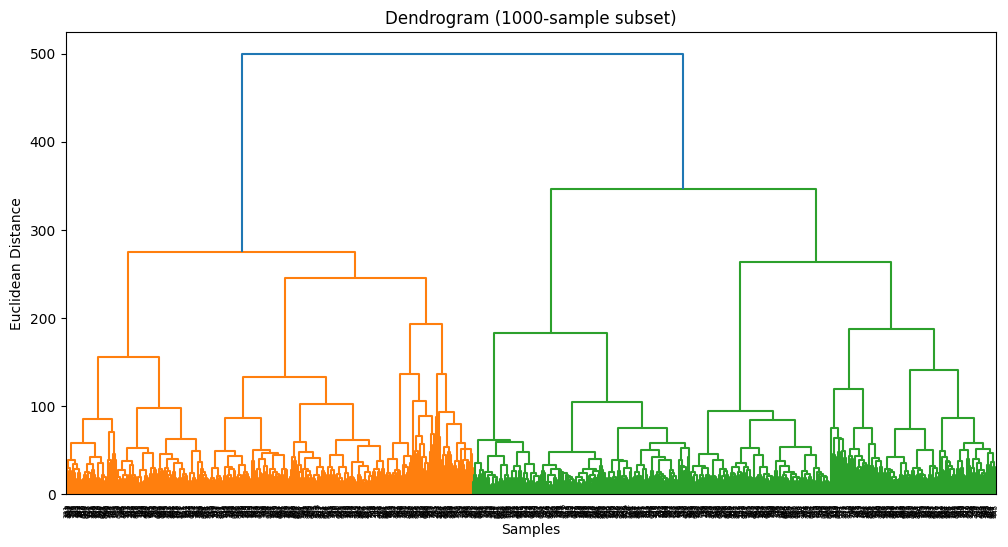

Agglomerative Clustering Accuracy (10k sample): 0.5142


In [5]:
#Task2.3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import accuracy_score
from scipy.stats import mode

train_df = pd.read_csv('fashion-mnist_train.csv')
test_df = pd.read_csv('fashion-mnist_test.csv')

X_train = train_df.drop('label', axis=1).values
y_train = train_df['label'].values
X_test = test_df.drop('label', axis=1).values
y_test = test_df['label'].values

X_full = np.concatenate((X_train, X_test), axis=0)
y_full = np.concatenate((y_train, y_test), axis=0)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_full)

X_dendro, y_dendro = resample(X_scaled, y_full, n_samples=1000, random_state=42)

linked = linkage(X_dendro, method='ward')

plt.figure(figsize=(12, 6))
dendrogram(linked, truncate_mode='level', p=30)
plt.title("Dendrogram (1000-sample subset)")
plt.xlabel("Samples")
plt.ylabel("Euclidean Distance")
plt.show()

X_cluster, y_cluster = resample(X_scaled, y_full, n_samples=10000, random_state=42)

agglo = AgglomerativeClustering(n_clusters=10, linkage='ward')
agglo_labels = agglo.fit_predict(X_cluster)

def map_clusters_to_labels(true_labels, cluster_labels):
    new_labels = np.zeros_like(cluster_labels)
    for i in range(10):
        mask = (cluster_labels == i)
        if np.any(mask):
            mode_result = mode(true_labels[mask], keepdims=True)
            new_labels[mask] = mode_result.mode[0]
    return new_labels

mapped_preds = map_clusters_to_labels(y_cluster, agglo_labels)
acc = accuracy_score(y_cluster, mapped_preds)
print("Agglomerative Clustering Accuracy (10k sample):", acc)

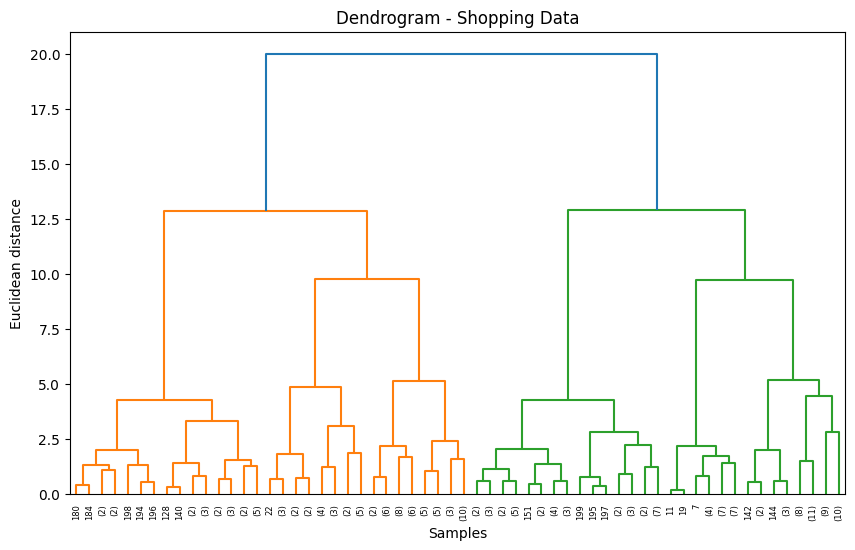

In [6]:
#Task3.1
import pandas as pd
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

df = pd.read_csv('shopping-data.csv')
X = df.drop(['CustomerID', 'Genre'], axis=1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
linked = linkage(X_scaled, method='ward')
plt.figure(figsize=(10, 6))
dendrogram(linked, truncate_mode='level', p=5)
plt.title("Dendrogram - Shopping Data")
plt.xlabel("Samples")
plt.ylabel("Euclidean distance")
plt.show()

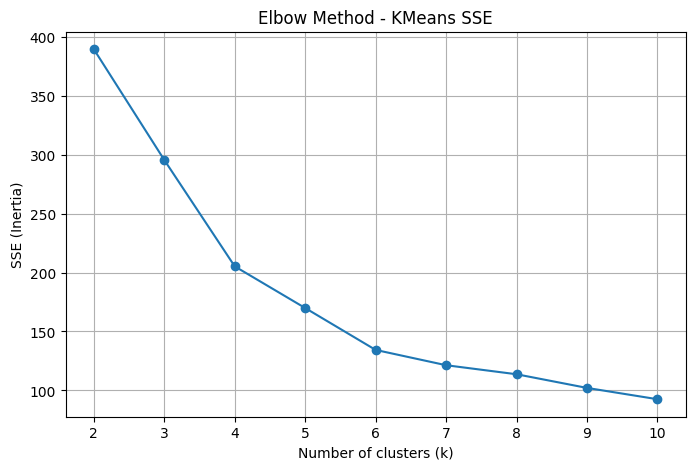

In [7]:
#Task3.2
from sklearn.cluster import KMeans
import numpy as np

sse = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans.fit(X_scaled)
    sse.append(kmeans.inertia_)
plt.figure(figsize=(8, 5))
plt.plot(k_range, sse, marker='o')
plt.title('Elbow Method - KMeans SSE')
plt.xlabel('Number of clusters (k)')
plt.ylabel('SSE (Inertia)')
plt.xticks(k_range)
plt.grid(True)
plt.show()

In [9]:
#Task3.3
from sklearn.cluster import AgglomerativeClustering
n_clusters = 5
agglo = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
labels = agglo.fit_predict(X_scaled)
df['Cluster'] = labels
df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Cluster']].head()

,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,19,15,39,4
1,21,15,81,0
2,20,16,6,4
3,23,16,77,0
4,31,17,40,4
